# Point to point dataset exploration

The purpose of this notebook is to explore the point to point dataset and getting some insights in order to successfully design a ML/AI solution to predict the outcome of tennis matches using the data available

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

I will start by loading a couple of files; all the files have the same structure anyway, so I'll just pick a random tournament

In [2]:
data_dir = 'data/pointbypoint/'

df_points = pd.read_csv(data_dir + '2016-frenchopen-points.csv')

df_matches = pd.read_csv(data_dir + '2016-frenchopen-matches.csv')

I will be focusing on the points file as it contains all information about matches; the matches file contains information such as the player names and the match location, date and so on

In [3]:
df_points.head()

,match_id,ElapsedTime,SetNo,P1GamesWon,P2GamesWon,SetWinner,GameNo,GameWinner,PointNumber,PointWinner,...,P2TurningPoint,ServeNumber,WinnerType,WinnerShotType,P1DistanceRun,P2DistanceRun,RallyCount,ServeWidth,ServeDepth,ReturnDepth
0,2016-frenchopen-1101,0:00:00,1,0,0,0,1,0,0,0,...,NaN,0,0,0,0.000,0.000,0,NaN,NaN,NaN
1,2016-frenchopen-1101,0:00:00,1,0,0,0,1,0,1,2,...,NaN,1,0,F,26.013,24.112,0,BC,NCTL,ND
2,2016-frenchopen-1101,0:00:31,1,0,0,0,1,0,2,1,...,NaN,2,0,0,19.678,22.228,8,BW,NCTL,ND
3,2016-frenchopen-1101,0:01:12,1,0,0,0,1,0,3,2,...,NaN,1,0,F,21.574,27.100,9,C,NCTL,ND
4,2016-frenchopen-1101,0:01:49,1,0,0,0,1,0,4,2,...,NaN,2,0,0,2.217,4.932,1,BW,NCTL,ND


In [4]:
df_points.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32165 entries, 0 to 32164
Data columns (total 65 columns):
match_id              32165 non-null object
ElapsedTime           32165 non-null object
SetNo                 32165 non-null int64
P1GamesWon            32165 non-null int64
P2GamesWon            32165 non-null int64
SetWinner             32165 non-null int64
GameNo                32165 non-null int64
GameWinner            32165 non-null int64
PointNumber           32165 non-null int64
PointWinner           32165 non-null int64
PointServer           32165 non-null int64
Speed_KMH             32165 non-null int64
Rally                 0 non-null float64
P1Score               32165 non-null object
P2Score               32165 non-null object
P1Momentum            0 non-null float64
P2Momentum            0 non-null float64
P1PointsWon           32165 non-null int64
P2PointsWon           32165 non-null int64
P1Ace                 32165 non-null int64
P2Ace                 32165 non-n

In [5]:
df_points.describe()

,SetNo,P1GamesWon,P2GamesWon,SetWinner,GameNo,GameWinner,PointNumber,PointWinner,PointServer,Speed_KMH,...,Serve_Direction,Winner_FH,Winner_BH,ServingTo,P1TurningPoint,P2TurningPoint,ServeNumber,P1DistanceRun,P2DistanceRun,RallyCount
count,32165.000000,32165.000000,32165.000000,32165.000000,32165.000000,32165.000000,32165.000000,32165.000000,32165.000000,32165.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,32165.000000,32165.000000,32165.000000,32165.000000
mean,2.115467,2.316275,2.363439,0.023846,5.526286,0.230375,103.923799,1.492678,1.490378,134.426022,...,NaN,NaN,NaN,NaN,NaN,NaN,1.299798,4.401965,4.364704,3.828509
std,1.065554,1.823903,1.822896,0.197981,3.230006,0.575289,73.367766,0.510782,0.510744,63.248489,...,NaN,NaN,NaN,NaN,NaN,NaN,0.537317,8.692587,8.675840,3.874075
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,45.000000,1.000000,1.000000,130.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,1.000000
50%,2.000000,2.000000,2.000000,0.000000,5.000000,0.000000,92.000000,1.000000,1.000000,153.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,3.000000
75%,3.000000,4.000000,4.000000,0.000000,8.000000,0.000000,149.000000,2.000000,2.000000,175.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,5.228000,5.099000,5.000000
max,5.000000,12.000000,10.000000,2.000000,22.000000,2.000000,421.000000,2.000000,2.000000,228.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,82.022000,84.485000,37.000000


Plenty of data there. Let's see what's in the matches file

In [6]:
df_matches.head()

,match_id,year,slam,match_num,player1,player2,status,winner,event_name,round,court_name,court_id,player1id,player2id,nation1,nation2
0,2016-frenchopen-1101,2016,frenchopen,1101,Novak Djokovic,Yen Hsun Lu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-frenchopen-1103,2016,frenchopen,1103,Gerald Melzer,Aljaz Bedene,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-frenchopen-1105,2016,frenchopen,1105,Bernard Tomic,Brian Baker,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-frenchopen-1107,2016,frenchopen,1107,Paul Henri Mathieu,Santiago Giraldo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-frenchopen-1109,2016,frenchopen,1109,David Ferrer,Evgeny Donskoy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 16 columns):
match_id      176 non-null object
year          176 non-null int64
slam          176 non-null object
match_num     176 non-null int64
player1       176 non-null object
player2       176 non-null object
status        0 non-null float64
winner        0 non-null float64
event_name    0 non-null float64
round         0 non-null float64
court_name    0 non-null float64
court_id      0 non-null float64
player1id     0 non-null float64
player2id     0 non-null float64
nation1       0 non-null float64
nation2       0 non-null float64
dtypes: float64(10), int64(2), object(4)
memory usage: 22.1+ KB


Let's begin by extracting some interesting features

In [8]:
df_points[[
    'match_id',
    'SetNo',
    'SetWinner',
    'GameNo',
    'GameWinner',
    'PointNumber',
    'PointWinner',
    'PointServer',
    'P1Score',
    'P2Score']].head(10)

,match_id,SetNo,SetWinner,GameNo,GameWinner,PointNumber,PointWinner,PointServer,P1Score,P2Score
0,2016-frenchopen-1101,1,0,1,0,0,0,0,0,0
1,2016-frenchopen-1101,1,0,1,0,1,2,2,0,15
2,2016-frenchopen-1101,1,0,1,0,2,1,2,15,15
3,2016-frenchopen-1101,1,0,1,0,3,2,2,15,30
4,2016-frenchopen-1101,1,0,1,0,4,2,2,15,40
5,2016-frenchopen-1101,1,0,1,2,5,2,2,0,0
6,2016-frenchopen-1101,1,0,2,0,6,1,1,15,0
7,2016-frenchopen-1101,1,0,2,0,7,2,1,15,15
8,2016-frenchopen-1101,1,0,2,0,8,1,1,30,15
9,2016-frenchopen-1101,1,0,2,0,9,1,1,40,15


Let's take a deeper look at aces (points scored with service). How likely are they? What are they characterised from?

In [9]:
df_points['P1Ace'].value_counts() + df_points['P2Ace'].value_counts()

0    62701
1     1629
dtype: int64

`P1Ace` and `P2Ace` are boolean features; the above means that 1629 points were scored with an ace versus 62701 services that weren't aces.

Let's check the speed of these services

In [10]:
df_points['Ace'] = df_points['P1Ace'] + df_points['P2Ace']

speed_ace_x = pd.crosstab(df_points['Ace'].sum(), df_points['Speed_MPH'])

speed_ace_x = speed_ace_x.transpose()
speed_ace_x.columns = ['Aces']
speed_ace_x = speed_ace_x[speed_ace_x.index >= 60]

speed_ace_x.head()

,Aces
Speed_MPH,
60,2
61,5
62,19
63,11
64,33


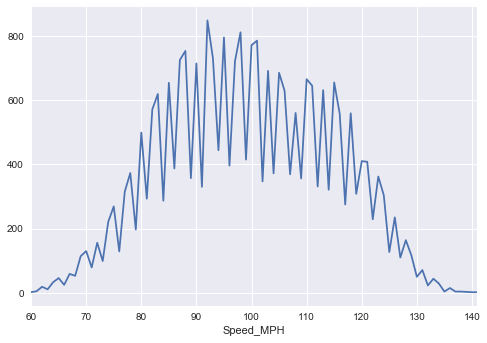

In [11]:
speed_ace_x.plot(legend=False)

Lovely distribution. Turns out that a faster service isn't necessarily an ace; I assume that serving too fast increases the probability of making a mistake.

Now let's try to gather data for the same games/sets together

In [12]:
df_set = df_points[df_points['SetWinner'] != 0].groupby(['match_id', 'SetNo']).sum()
df_set.head()

P1GamesWon  P2GamesWon  SetWinner  GameNo  \
match_id             SetNo                                              
2016-frenchopen-1101 1               6           4          1      10   
                     2               6           1          1       7   
                     3               6           1          1       7   
2016-frenchopen-1103 1               6           4          1      10   
                     2               3           6          2       9   

                            GameWinner  PointNumber  PointWinner  PointServer  \
match_id             SetNo                                                      
2016-frenchopen-1101 1               1           63            1            1   
                     2               1          109            1            2   
                     3               1          148            1            1   
2016-frenchopen-1103 1               1           55            1            1   
                     2               2          101            2            2   

                            Speed_KMH  Rally ...   Winner_FH  Winner_BH  \
match_id             SetNo                   ...                          
2016-frenchopen-1101 1            127    NaN ...         NaN        NaN   
                     2            151    NaN ...         NaN        NaN   
                     3            135    NaN ...         NaN        NaN   
2016-frenchopen-1103 1            184    NaN ...         NaN        NaN   
                     2            189    NaN ...         NaN        NaN   

                            ServingTo  P1TurningPoint  P2TurningPoint  \
match_id             SetNo                                              
2016-frenchopen-1101 1            NaN             NaN             NaN   
                     2            NaN             NaN             NaN   
                     3            NaN             NaN             NaN   
2016-frenchopen-1103 1            NaN             NaN             NaN   
                     2            NaN             NaN             NaN   

                            ServeNumber  P1DistanceRun  P2DistanceRun  \
match_id             SetNo                                              
2016-frenchopen-1101 1                2          5.569          8.892   
                     2                2          8.330          5.822   
                     3                2         11.811         14.284   
2016-frenchopen-1103 1                1          0.000          0.000   
                     2                1          0.000          0.000   

                            RallyCount  Ace  
match_id             SetNo                   
2016-frenchopen-1101 1               3    0  
                     2               2    0  
                     3               5    0  
2016-frenchopen-1103 1               1    1  
                     2               5    0  

[5 rows x 56 columns]

This dataframe can use some cleaning

In [15]:
df_set = df_set[[
    'P1GamesWon',
    'P2GamesWon',
    'SetWinner'
]]

df_set.columns = [
    'P1GamesWon',
    'P2GamesWon',
    'SetWinner'
]

df_set['ServicePlayer'] = df_points[df_points['SetWinner'] != 0].groupby(['match_id', 'SetNo']).mean()[['PointServer']]
df_set['AvgServiceSpeed_KMH'] = df_points[df_points['SetWinner'] != 0].groupby(['match_id', 'SetNo']).mean()[['Speed_KMH']]

df_set.head(10)

P1GamesWon  P2GamesWon  SetWinner  ServicePlayer  \
match_id             SetNo                                                     
2016-frenchopen-1101 1               6           4          1              1   
                     2               6           1          1              2   
                     3               6           1          1              1   
2016-frenchopen-1103 1               6           4          1              1   
                     2               3           6          2              2   
                     3               4           6          2              2   
                     4               4           6          2              2   
2016-frenchopen-1105 1               6           3          1              1   
                     2               6           4          1              1   
                     3               6           4          1              1   

                            AvgServiceSpeed_KMH  
match_id             SetNo                       
2016-frenchopen-1101 1                      127  
                     2                      151  
                     3                      135  
2016-frenchopen-1103 1                      184  
                     2                      189  
                     3                      180  
                     4                      185  
2016-frenchopen-1105 1                      183  
                     2                      171  
                     3                      192

So what I've got is: for each match, for each set of the match: points scored by the two players, the set winner and the average service speed in Km/h.

Now I want to check a famous assumption: is the player serving more likely to win the set?

In [16]:
df_set[['SetWinner', 'ServicePlayer']].corr()

,SetWinner,ServicePlayer
SetWinner,1.000000,0.283762
ServicePlayer,0.283762,1.000000


The correlation shows that there is a connection; let's try to visualize it

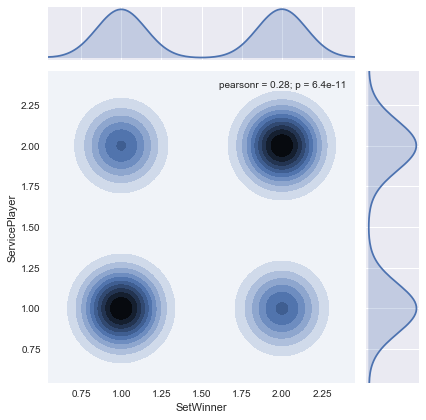

In [17]:
sns.jointplot("SetWinner", "ServicePlayer", df_set, kind='kde')

Another feature might be the difference between won games; if a player has won the first two sets with a high difference (e.g. 6-0, 6-1) isn't it more likely that he will win the third set as well?

In [18]:
df_set['GameDiff'] = df_set['P1GamesWon'] - df_set['P2GamesWon']

df_set.head(15)

P1GamesWon  P2GamesWon  SetWinner  ServicePlayer  \
match_id             SetNo                                                     
2016-frenchopen-1101 1               6           4          1              1   
                     2               6           1          1              2   
                     3               6           1          1              1   
2016-frenchopen-1103 1               6           4          1              1   
                     2               3           6          2              2   
                     3               4           6          2              2   
                     4               4           6          2              2   
2016-frenchopen-1105 1               6           3          1              1   
                     2               6           4          1              1   
                     3               6           4          1              1   
2016-frenchopen-1107 1               6           4          1              2   
                     2               6           7          2              1   
                     3               6           4          1              1   
                     4               1           6          2              2   
                     5               6           3          1              1   

                            AvgServiceSpeed_KMH  GameDiff  
match_id             SetNo                                 
2016-frenchopen-1101 1                      127         2  
                     2                      151         5  
                     3                      135         5  
2016-frenchopen-1103 1                      184         2  
                     2                      189        -3  
                     3                      180        -2  
                     4                      185        -2  
2016-frenchopen-1105 1                      183         3  
                     2                      171         2  
                     3                      192         2  
2016-frenchopen-1107 1                      127         2  
                     2                      150        -1  
                     3                      174         2  
                     4                      180        -5  
                     5                      135         3

Now I want to add one more dimension to the data with a finer level of granularity: let's break the data down by match, set and game

In [19]:
df_history = df_points[df_points['PointWinner'] != 0].groupby(['match_id', 'SetNo', 'GameNo', 'PointNumber']).sum()

df_history.head(15)

P1GamesWon  P2GamesWon  \
match_id             SetNo GameNo PointNumber                           
2016-frenchopen-1101 1     1      1                     0           0   
                                  2                     0           0   
                                  3                     0           0   
                                  4                     0           0   
                                  5                     0           1   
                           2      6                     0           1   
                                  7                     0           1   
                                  8                     0           1   
                                  9                     0           1   
                                  10                    1           1   
                           3      11                    1           1   
                                  12                    1           1   
                                  13                    1           1   
                                  14                    1           1   
                                  15                    1           1   

                                               SetWinner  GameWinner  \
match_id             SetNo GameNo PointNumber                          
2016-frenchopen-1101 1     1      1                    0           0   
                                  2                    0           0   
                                  3                    0           0   
                                  4                    0           0   
                                  5                    0           2   
                           2      6                    0           0   
                                  7                    0           0   
                                  8                    0           0   
                                  9                    0           0   
                                  10                   0           1   
                           3      11                   0           0   
                                  12                   0           0   
                                  13                   0           0   
                                  14                   0           0   
                                  15                   0           0   

                                               PointWinner  PointServer  \
match_id             SetNo GameNo PointNumber                             
2016-frenchopen-1101 1     1      1                      2            2   
                                  2                      1            2   
                                  3                      2            2   
                                  4                      2            2   
                                  5                      2            2   
                           2      6                      1            1   
                                  7                      2            1   
                                  8                      1            1   
                                  9                      1            1   
                                  10                     1            1   
                           3      11                     1            2   
                                  12                     1            2   
                                  13                     2            2   
                                  14                     2            2   
                                  15                     1            2   

                                               Speed_KMH  Rally  P1Momentum  \
match_id             SetNo GameNo PointNumber                                 
2016-frenchopen-1101 1     1      1                    0    NaN         NaN   
                                  2                  137    NaN    

In [20]:
df_history.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 31989 entries, (2016-frenchopen-1101, 1, 1, 1) to (2016-frenchopen-2701, 2, 10, 148)
Data columns (total 54 columns):
P1GamesWon            31989 non-null int64
P2GamesWon            31989 non-null int64
SetWinner             31989 non-null int64
GameWinner            31989 non-null int64
PointWinner           31989 non-null int64
PointServer           31989 non-null int64
Speed_KMH             31989 non-null int64
Rally                 0 non-null float64
P1Momentum            0 non-null float64
P2Momentum            0 non-null float64
P1PointsWon           31989 non-null int64
P2PointsWon           31989 non-null int64
P1Ace                 31989 non-null int64
P2Ace                 31989 non-null int64
P1Winner              31989 non-null int64
P2Winner              31989 non-null int64
P1DoubleFault         31989 non-null int64
P2DoubleFault         31989 non-null int64
P1UnfErr              31989 non-null int64
P2UnfErr             

For the sake of simplicity let's boil it down to the minimal

In [21]:
df_history = df_history[[
    'PointServer',
    'PointWinner',
]]

df_history.head(15)

PointServer  PointWinner
match_id             SetNo GameNo PointNumber                          
2016-frenchopen-1101 1     1      1                      2            2
                                  2                      2            1
                                  3                      2            2
                                  4                      2            2
                                  5                      2            2
                           2      6                      1            1
                                  7                      1            2
                                  8                      1            1
                                  9                      1            1
                                  10                     1            1
                           3      11                     2            1
                                  12                     2            1
                                  13                     2            2
                                  14                     2            2
                                  15                     2            1

This dataset contains a lot of interesting information; I believe that the best results can be achieved by combining data about the points and about the matches to get a complete overview of all the factors influencing a match outcome.

This brief exploration is just the first step in exploiting the potential of this dataset